<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [717]:
import pandas as pd
import nltk
import seaborn as sns

nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [718]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [719]:
df = {}

In [720]:
df["train"] = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [721]:
df["validation"] = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [722]:
df["test"] = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [723]:
# put your answer here
df["train"].head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


In [724]:
df["validation"].head(10)

,text,label
0,VinTee [USERNAME] [USERNAME] and [USERNAME] Ka...,1
1,binay's sidekicks were employees of makati cit...,1
2,This is expected as we use different methodol...,0
3,Ang tanga tanga talaga ni Nancy Binay eh. Tskkk.,1
4,Binay giving away bracelets after every selfie...,0
5,Sana alam ni mar roxas yung mga pinagsasabi niya,1
6,letse naman leni wala ka tlgang magawa?!,1
7,Bilong ?? [USERNAME] [USERNAME] Alam na ni Lit...,1
8,Binay still mum on performance at PiliPinas De...,1
9,are these dreamers that wont happen and they w...,0


In [725]:
df["test"].head(10)

,text,label
0,Binay: Patuloy ang kahirapan dahil sa maling p...,0
1,SA GOBYERNONG TAPAT WELCOME SA BAGUO ANG LAHAT...,0
2,wait so ur telling me Let Leni Lead mo pero NY...,1
3,[USERNAME]wish this is just a nightmare that ...,0
4,doc willie ong and isko sabunutan po,0
5,Jeonghan said Let Leni Lead!! Lenihae ahahhdjfj,0
6,[USERNAME] [USERNAME]and[USERNAME] Hahahhahaha...,1
7,[USERNAME] Attendees of the CNNPHVPDebate are ...,0
8,Abscbn News Hoaxnews ng abias cbend baklas pos...,1
9,NEWS UPDATE: The camp of VP Leni Robredo says ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [726]:
for k in splits:
  print(f"\n\n{k} INFO:")
  df[k].info()



train INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


validation INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2800 non-null   object
 1   label   2800 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.9+ KB


test INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2810 non-null   object
 1   label   2810 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.0+ KB


3. Check for NaN values

In [727]:
for k in splits:
  print(f"\n[{k}]")
  print(df[k].isnull().sum())


[train]
text     0
label    0
dtype: int64

[validation]
text     0
label    0
dtype: int64

[test]
text     0
label    0
dtype: int64


4. Check for duplicate rows

In [728]:
for k in splits:
  print(f"\n[{k}]")
  print(df[k].duplicated().sum())


[train]
0

[validation]
0

[test]
0


5. Check how many rows belong to each class

In [729]:
for k in splits:
  print(f"\n[{k}]: {len(df[k])}")


[train]: 21773

[validation]: 2800

[test]: 2810


## B. Text pre-processing

6. Remove duplicate rows

In [730]:
for k in splits:
  df[k].drop_duplicates()
  print(f"\nUpdated Length [{k}]: {len(df[k])}")


Updated Length [train]: 21773

Updated Length [validation]: 2800

Updated Length [test]: 2810


7. Remove rows with NaN values

In [731]:
for k in splits:
  df[k].dropna()
  print(f"\nUpdated Length [{k}]: {len(df[k])}")


Updated Length [train]: 21773

Updated Length [validation]: 2800

Updated Length [test]: 2810


8. Convert all text to lowercase

In [732]:
for k in splits:
  df[k]["text"] = df[k]["text"].str.lower()

In [733]:
for k in splits:
  print(f"\n[{k}]")
  print(df[k].head(5))


[train]
                                                text  label
0  presidential candidate mar roxas implies that ...      1
1  parang may mali na sumunod ang patalastas ng n...      1
2                    bet ko. pula ang kulay ng posas      1
3                               [username] kakampink      0
4  bakit parang tahimik ang mga pink about doc wi...      1

[validation]
                                                text  label
0  vintee [username] [username] and [username] ka...      1
1  binay's sidekicks were employees of makati cit...      1
2   this is expected as we use different methodol...      0
3   ang tanga tanga talaga ni nancy binay eh. tskkk.      1
4  binay giving away bracelets after every selfie...      0

[test]
                                                text  label
0  binay: patuloy ang kahirapan dahil sa maling p...      0
1  sa gobyernong tapat welcome sa baguo ang lahat...      0
2  wait so ur telling me let leni lead mo pero ny...      1
3   [user

9. Remove digits, URLS and special characters

In [734]:
import re

def cleanText(text):
  text = re.sub(r"\n","",text)   #remove line breaks
  text = text.lower() #convert to lowercase
  text = re.sub(r"\d+","",text)   #remove digits and currencies
  text = re.sub(r'[\$\d+\d+\$]', "", text)
  text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   #remove dates
  text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
  text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
  text = re.sub(r'[^\x00-\x7f]',r' ',text)   #remove non-ascii
  text = re.sub(r'[^\w\s]','',text)   #remove punctuation
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   #remove hyperlinks

  return text

In [735]:
for k in splits:
  df[k]["text"].apply(cleanText)

In [736]:
for k in splits:
  print(f"\n[{k}]:")
  print(df[k].head(10))


[train]:
                                                text  label
0  presidential candidate mar roxas implies that ...      1
1  parang may mali na sumunod ang patalastas ng n...      1
2                    bet ko. pula ang kulay ng posas      1
3                               [username] kakampink      0
4  bakit parang tahimik ang mga pink about doc wi...      1
5  "ang sinungaling sa umpisa ay sinungaling hang...      1
6                                          leni kiko      0
7  nahiya si binay sa makati kaya dito na lang sa...      1
8                            another reminderhalalan      0
9  [username] maybe because vp leni sen kiko and ...      0

[validation]:
                                                text  label
0  vintee [username] [username] and [username] ka...      1
1  binay's sidekicks were employees of makati cit...      1
2   this is expected as we use different methodol...      0
3   ang tanga tanga talaga ni nancy binay eh. tskkk.      1
4  binay giving

10. Remove stop words

In [737]:
stopWords = ["ako", "sa", "akin", "ko", "aking", "sarili", "kami", "atin", "ang", "aming", "amin", "ating", "ka", "iyong", "iyo", "inyong",
    "siya", "kanya", "mismo", "ito", "nito", "kanyang", "sila", "nila", "kanila", "kanilang", "kung", "ano", "alin", "sino", "kanino",
    "na", "mga", "iyon", "am", "ay", "maging", "naging", "mayroon", "may", "nagkaroon", "pagkakaroon", "gumawa", "ginagawa", "ginawa",
    "paggawa", "ibig", "dapat", "maaari", "marapat", "kong", "ikaw", "tayo", "hindi", "namin", "gusto", "nais", "niyang", "nilang",
    "niya", "huwag", "ginawang", "gagawin", "maaaring", "sabihin", "narito", "kapag", "ni", "nasaan", "bakit", "paano", "kailangan",
    "walang", "katiyakan", "isang", "at", "pero", "o", "dahil", "bilang", "hanggang", "habang", "ng", "pamamagitan", "para", "tungkol",
    "laban", "pagitan", "panahon", "bago", "pagkatapos", "itaas", "ibaba", "mula", "pataas", "pababa", "palabas", "ibabaw", "ilalim",
    "muli", "pa", "minsan", "dito", "doon", "saan", "lahat", "anumang", "kapwa", "bawat", "ilan", "karamihan", "iba", "tulad", "lamang",
    "pareho", "kaya", "kaysa", "masyado", "napaka", "isa", "bababa", "kulang", "marami", "ngayon", "kailanman", "sabi", "nabanggit",
    "din", "kumuha", "pumunta", "pumupunta", "ilagay", "makita", "nakita", "katulad", "mahusay", "likod", "kahit", "paraan", "noon",
    "gayunman", "dalawa", "tatlo", "apat", "lima", "una", "pangalawa"]
stopWords = stopWords + stopwords.words("english")

In [738]:
import re
def cleanSW(text):
  return ' '.join([word for word in text.split() if word.lower() not in stopWords])

In [739]:
for k in splits:
  df[k]["text"].apply(cleanSW)

In [740]:
for k in splits:
  print(f"\n[{k}]:")
  print(df[k].head(10))


[train]:
                                                text  label
0  presidential candidate mar roxas implies that ...      1
1  parang may mali na sumunod ang patalastas ng n...      1
2                    bet ko. pula ang kulay ng posas      1
3                               [username] kakampink      0
4  bakit parang tahimik ang mga pink about doc wi...      1
5  "ang sinungaling sa umpisa ay sinungaling hang...      1
6                                          leni kiko      0
7  nahiya si binay sa makati kaya dito na lang sa...      1
8                            another reminderhalalan      0
9  [username] maybe because vp leni sen kiko and ...      0

[validation]:
                                                text  label
0  vintee [username] [username] and [username] ka...      1
1  binay's sidekicks were employees of makati cit...      1
2   this is expected as we use different methodol...      0
3   ang tanga tanga talaga ni nancy binay eh. tskkk.      1
4  binay giving

11. Use Stemming or Lemmatization

In [741]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

MODE = 'S'

In [742]:
def lemOrStem(text):
  tokens = None
  if (MODE == 'L'):
    lemmer = WordNetLemmatizer()
    tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]

  elif (MODE == 'S'):
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in word_tokenize(text)]

  return ' '.join(tokens)

In [743]:
for k in splits:
  df[k]["text"].apply(lemOrStem)

In [744]:
for k in splits:
  print(f"\n[{k}]:")
  print(df[k].head(10))


[train]:
                                                text  label
0  presidential candidate mar roxas implies that ...      1
1  parang may mali na sumunod ang patalastas ng n...      1
2                    bet ko. pula ang kulay ng posas      1
3                               [username] kakampink      0
4  bakit parang tahimik ang mga pink about doc wi...      1
5  "ang sinungaling sa umpisa ay sinungaling hang...      1
6                                          leni kiko      0
7  nahiya si binay sa makati kaya dito na lang sa...      1
8                            another reminderhalalan      0
9  [username] maybe because vp leni sen kiko and ...      0

[validation]:
                                                text  label
0  vintee [username] [username] and [username] ka...      1
1  binay's sidekicks were employees of makati cit...      1
2   this is expected as we use different methodol...      0
3   ang tanga tanga talaga ni nancy binay eh. tskkk.      1
4  binay giving

## C. Training your model

12. Put all text training data in variable **X_train**

In [745]:
x = {
    "train": df["train"]["text"],
    "test": df["test"]["text"],
    "validation": df["validation"]["text"],
}

13. Put all training data labels in variable **y_train**

In [746]:
y = {
    "train": df["train"]["label"],
    "test": df["test"]["label"],
    "validation": df["validation"]["label"],
}

In [747]:
x["train"]

,text
0,presidential candidate mar roxas implies that ...
1,parang may mali na sumunod ang patalastas ng n...
2,bet ko. pula ang kulay ng posas
3,[username] kakampink
4,bakit parang tahimik ang mga pink about doc wi...
...,...
21768,marcos talunan marcos magnanakaw
21769,grabe kayo kay binay ??????????
21770,[username] cnu ba naman ang hindimabibighani s...
21771,rt [username]: tabi tabi yung mga nagsasabing ...


14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [748]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [749]:
vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer()
xTrainTrans = vectorizer.fit_transform(x["train"])

15. Create an instance of `MultinomalNB()`

In [750]:
model = MultinomialNB(alpha=0.1)

16. Train the model using `.fit()`

In [751]:
model.fit(xTrainTrans, y["train"])

MultinomialNB(alpha=0.1)

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [752]:
X_validation = x["validation"]
prediction = model.predict(vectorizer.transform(X_validation))

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [753]:
def dataMetrics(dataset, predRes):
  accuracy = accuracy_score(y[dataset], predRes)
  bAccuracy = balanced_accuracy_score(y[dataset], predRes)
  precision = precision_score(y[dataset], predRes)

  print("Accuracy:",round(100 * accuracy, 2),'%')
  print("Balanced accuracy:",round(100 * bAccuracy, 2),'%')
  print("Precision:", round(100 * precision, 2),'%')

dataMetrics("validation", prediction)

Accuracy: 83.32 %
Balanced accuracy: 83.27 %
Precision: 80.7 %


19. Create a confusion matrix using the **validation dataset**

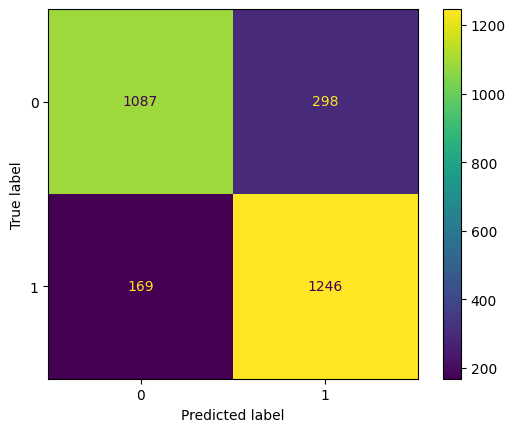

In [754]:
import matplotlib.pyplot as plt

def matrix(dataset, predRes):
  cm = confusion_matrix(y[dataset], predRes)

  disp = ConfusionMatrixDisplay(
      confusion_matrix = cm,
      display_labels = model.classes_
  )

  disp.plot()
  plt.show()

matrix("validation", prediction)

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [755]:
testPred = model.predict(vectorizer.transform(x["test"]))

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [756]:
dataMetrics("test", testPred)

Accuracy: 82.63 %
Balanced accuracy: 82.65 %
Precision: 79.93 %


22. Create a confusion matrix using the **test dataset**

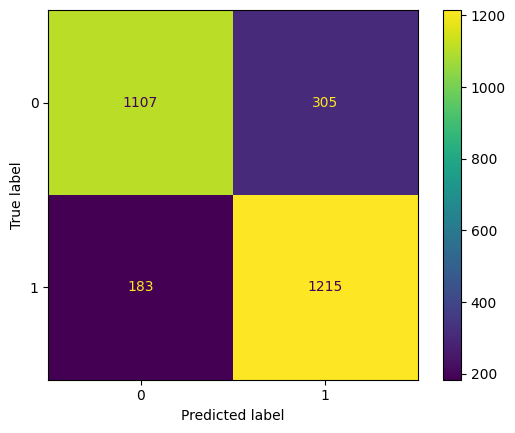

In [757]:
matrix("test", testPred)

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [758]:
# put your answer here
nonHate = pd.Series("gusto ko ng short hair girl na chinita with eyeglasses")
model.predict(vectorizer.transform(nonHate))

array([0])

24. Test the model by providing a hate speech input. The model should predict it as 1

In [759]:
# put your answer here
hate = pd.Series("Fucking shit")
model.predict(vectorizer.transform(hate))

array([1])

In [760]:
sample = pd.Series("Ang init ng ulo ko ang gulo gulo ng paligid ang sarap talaga sumigaw ng Putang Ina")
model.predict(vectorizer.transform(sample))

array([1])